**GDP PREDICTIVE MODEL FOR SADC COUNTRIES**

In [1]:
# Installing the 'wbgapi' library
!pip install wbgapi

In [2]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import wbgapi as wb
import requests

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import joblib
from sklearn.preprocessing import LabelEncoder

# Data Processing & Analysis (Data Retrieval, Transformation & Cleaning)

In [3]:
# Retrieving information about World Bank series related to Gross Domestic Product (GDP)
wb.series.info(q='GDP')

id,value
EG.GDP.PUSE.KO.PP,GDP per unit of energy use (PPP $ per kg of oil equivalent)
EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent)
EG.USE.COMM.GD.PP.KD,"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)"
NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)"
NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)"
NY.GDP.DEFL.ZS,GDP deflator (base year varies by country)
NY.GDP.DEFL.ZS.AD,GDP deflator: linked series (base year varies by country)
NY.GDP.DISC.CN,Discrepancy in expenditure estimate of GDP (current LCU)
NY.GDP.DISC.KN,Discrepancy in expenditure estimate of GDP (constant LCU)
NY.GDP.MKTP.CD,GDP (current US$)


In [4]:
# Retrieving information about World Bank series related to 'Foreign'
wb.series.info(q='Foreign')

id,value
BM.KLT.DINV.CD.WD,"Foreign direct investment, net outflows (BoP, current US$)"
BM.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net outflows (% of GDP)"
BN.KLT.DINV.CD,"Foreign direct investment, net (BoP, current US$)"
BX.KLT.DINV.CD.WD,"Foreign direct investment, net inflows (BoP, current US$)"
BX.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net inflows (% of GDP)"
FM.AST.NFRG.CN,Net foreign assets (current LCU)
,6 elements


In [5]:
# Retrieving information about World Bank series related to 'Government'
wb.series.info(q='Government')

id,value
FM.AST.CGOV.ZG.M3,Claims on central government (annual growth as % of broad money)
FS.AST.CGOV.GD.ZS,"Claims on central government, etc. (% GDP)"
GC.DOD.TOTL.CN,"Central government debt, total (current LCU)"
GC.DOD.TOTL.GD.ZS,"Central government debt, total (% of GDP)"
GE.EST,Government Effectiveness: Estimate
GE.NO.SRC,Government Effectiveness: Number of Sources
GE.PER.RNK,Government Effectiveness: Percentile Rank
GE.PER.RNK.LOWER,"Government Effectiveness: Percentile Rank, Lower Bound of 90% Confidence Interval"
GE.PER.RNK.UPPER,"Government Effectiveness: Percentile Rank, Upper Bound of 90% Confidence Interval"
GE.STD.ERR,Government Effectiveness: Standard Error


In [6]:
# Collecting and labelling all keys and placing them into a dataframe

vars_dict = {'code': ['NY.GDP.MKTP.KD.ZG', 'NY.GDP.MKTP.KD','NY.GDP.PCAP.KD',
                      'NE.CON.GOVT.ZS', 'NE.CON.PRVT.ZS', 'GC.NFN.TOTL.GD.ZS','NY.GDP.DEFL.KD.ZG', 'EG.FEC.RNEW.ZS',
                      'SL.UEM.TOTL.NE.ZS','SL.EMP.TOTL.SP.NE.ZS','HD.HCI.OVRL','SL.AGR.EMPL.ZS','SL.EMP.VULN.ZS',
                      # Environment:
                      'EN.POP.SLUM.UR.ZS','ER.H2O.INTR.PC',
                      'NE.IMP.GNFS.ZS','NE.EXP.GNFS.ZS','BX.KLT.DINV.CD.WD','GC.DOD.TOTL.GD.ZS','FR.INR.RINR',

                      'SI.POV.GINI','BN.CAB.XOKA.GD.ZS','SP.POP.TOTL','EN.POP.DNST','SP.POP.GROW',
                      'SP.DYN.LE00.IN','SP.DYN.CDRT.IN', 'SH.DYN.MORT',
                      # Agric:
                      'EG.ELC.RNEW.ZS','AG.LND.AGRI.ZS',
                      # Climate change:
                      'EG.ELC.ACCS.ZS','EG.USE.ELEC.KH.PC',
                      # Energy & Mining:
                      'TX.VAL.FUEL.ZS.UN','TX.VAL.MMTL.ZS.UN',
                      'EN.ATM.CO2E.PC','EN.CLC.GHGR.MT.CE','NV.IND.TOTL.ZS','NV.SRV.EMPL.KD',
                      'SE.ENR.PRSC.FM.ZS','SE.ADT.LITR.ZS','SE.TER.CUAT.BA.ZS','VC.IHR.PSRC.P5','SP.POP.SCIE.RD.P6'],
            'label': ['GDP Growth%', 'GDP','GDP Per Capita',
                      'GDP Government pp', 'GDP Private pp', 'Investment', 'Inflation', 'Renewable Energy',
                      'Unemployment','Employment','Human Capital Index','Agriculture Employment','Vulnerable Employment',
                      #Environment:
                      'Population in Slums','Freshwater Resources',
                      'Imports','Exports','FDI','Government Debt','Real Interest Rate',

                      'Gini Index','Current Account Balance','Population','Population Density','Population Growth',
                      'Life Expectancy','Death Rate', 'Child Mortality',
                      # Agriculture:
                      'Renewable Energy Output','Agricultural Land',
                      # Climate Change:
                      'Electricity Access','Power Consumption',
                      # Energy & Mining:
                      'Fuel Exports','Metal Exports',
                      'CO2 Emissions','ghg Emissions','Industry GDP','Value Added Services',
                      'School Enrollment','Literacy','Bachelor','Homicide','Research']}

Variables = pd.DataFrame(vars_dict)

In [7]:
# Getting the length of the 'Variables' object
len(Variables)

43

In [8]:
# Variable code, label and definition
# Assigning an empty column 'definition' to the 'Variables' DataFrame
Variables = Variables.assign(definition='')

# Populating the 'definition' column with values obtained from the World Bank API
for i in range(0,len(Variables)):
    Variables.iloc[i,2] = wb.series.get(id=Variables.iloc[i,0])['value']

In [9]:
# Displaying the content of the 'Variables' variable
print(Variables)

                    code                    label  \
0      NY.GDP.MKTP.KD.ZG              GDP Growth%   
1         NY.GDP.MKTP.KD                      GDP   
2         NY.GDP.PCAP.KD           GDP Per Capita   
3         NE.CON.GOVT.ZS        GDP Government pp   
4         NE.CON.PRVT.ZS           GDP Private pp   
5      GC.NFN.TOTL.GD.ZS               Investment   
6      NY.GDP.DEFL.KD.ZG                Inflation   
7         EG.FEC.RNEW.ZS         Renewable Energy   
8      SL.UEM.TOTL.NE.ZS             Unemployment   
9   SL.EMP.TOTL.SP.NE.ZS               Employment   
10           HD.HCI.OVRL      Human Capital Index   
11        SL.AGR.EMPL.ZS   Agriculture Employment   
12        SL.EMP.VULN.ZS    Vulnerable Employment   
13     EN.POP.SLUM.UR.ZS      Population in Slums   
14        ER.H2O.INTR.PC     Freshwater Resources   
15        NE.IMP.GNFS.ZS                  Imports   
16        NE.EXP.GNFS.ZS                  Exports   
17     BX.KLT.DINV.CD.WD                      

In [10]:
# Function for obtaining a clean dataframe with columns "Country Code", "Year", and Economic indicators:

def vert_df(gdp_df, name):

    # Replacing 'YR' in column names
    gdp_df.columns = gdp_df.columns.str.replace('YR','')

    # Resetting index and drop 'Country' column
    gdp_df = gdp_df.reset_index()
    gdp_df.drop('Country', inplace=True, axis=1) # Dropping "Country" - we are using the Country code instead

    year_drop = list(range(1960, 1992)) # Dropping all years before 1992
    year_drop = [*map(str,year_drop)]
    gdp_df.drop(year_drop, inplace=True, axis=1)

    # Melting DataFrame to vertical format
    gdp_df = gdp_df.melt(id_vars = ['economy'], var_name = 'Year', value_name = name)

    # Converting 'Year' column to numeric
    gdp_df.Year = pd.to_numeric(gdp_df.Year)
    return gdp_df

In [11]:
# loop for creating dataframe to export:

# Initializing 'gdp_df' by converting the first World Bank series using the 'vert_df' function
gdp_df = vert_df(wb.data.DataFrame(Variables.iloc[0,0], labels=True), Variables.iloc[0,1])

# Iterating over the remaining World Bank series and merging with 'gdp_df'
for i in range(1, len(Variables)):
    wbcode, wblabel = Variables.iloc[i,0], Variables.iloc[i,1]

    # Fetching and processing data for the current World Bank series using the 'vert_df' function
    new_data = vert_df(wb.data.DataFrame(wbcode, labels=True), wblabel)

    # Merging the new data with 'gdp_df' based on 'economy' and 'Year'
    gdp_df = pd.merge(gdp_df, new_data, how='left', on=['economy', 'Year'])

In [12]:
# Replacing label:
# Renaming the 'economy' column to 'Country Code' in the 'gdp_df' DataFrame
gdp_df.rename(columns = {'economy':'Country Code'}, inplace = True)

In [13]:
# Displaying the content of the 'gdp_df' DataFrame
print(gdp_df)

     Country Code  Year  GDP Growth%           GDP  GDP Per Capita  \
0             ZWE  1992    -9.015570  1.600947e+10     1504.437140   
1             ZMB  1992    -1.730922  6.720005e+09      832.267134   
2             YEM  1992     8.207598  2.750967e+10     1905.924245   
3             PSE  1992          NaN           NaN             NaN   
4             VIR  1992          NaN           NaN             NaN   
...           ...   ...          ...           ...             ...   
8241          CEB  2022     4.127485  1.630928e+12    16291.651887   
8242          CSS  2022    13.217205  8.180554e+10    10899.444048   
8243          ARB  2022     6.033833  2.909301e+12     6260.802664   
8244          AFW  2022     3.766354  8.938137e+11     1822.878716   
8245          AFE  2022     3.435138  1.072261e+12     1487.476418   

      GDP Government pp  GDP Private pp  Investment   Inflation  \
0             24.158070       64.863924         NaN  -14.129658   
1                   NaN  

In [14]:
# Saving the 'gdp_df' DataFrame to a CSV file named 'WorldBankIndicators.csv' without including the index
gdp_df.to_csv('WorldBankIndicators.csv', index=False)

In [15]:
# Reading the data from the CSV file 'WorldBankIndicators.csv' into the 'World_data' DataFrame
World_data = pd.read_csv('/content/WorldBankIndicators.csv')

# EDA (Exploratory Data Analysis)

In [16]:
# Printing the columns of the World_data DataFrame
World_data.columns

Index(['Country Code', 'Year', 'GDP Growth%', 'GDP', 'GDP Per Capita',
       'GDP Government pp', 'GDP Private pp', 'Investment', 'Inflation',
       'Renewable Energy', 'Unemployment', 'Employment', 'Human Capital Index',
       'Agriculture Employment', 'Vulnerable Employment',
       'Population in Slums', 'Freshwater Resources', 'Imports', 'Exports',
       'FDI', 'Government Debt', 'Real Interest Rate', 'Gini Index',
       'Current Account Balance', 'Population', 'Population Density',
       'Population Growth', 'Life Expectancy', 'Death Rate', 'Child Mortality',
       'Renewable Energy Output', 'Agricultural Land', 'Electricity Access',
       'Power Consumption', 'Fuel Exports', 'Metal Exports', 'CO2 Emissions',
       'ghg Emissions', 'Industry GDP', 'Value Added Services',
       'School Enrollment', 'Literacy', 'Bachelor', 'Homicide', 'Research'],
      dtype='object')

In [17]:
# Displaying concise summary of World_data DataFrame, including data types and non-null counts
World_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8246 entries, 0 to 8245
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country Code             8246 non-null   object 
 1   Year                     8246 non-null   int64  
 2   GDP Growth%              7638 non-null   float64
 3   GDP                      7614 non-null   float64
 4   GDP Per Capita           7618 non-null   float64
 5   GDP Government pp        6410 non-null   float64
 6   GDP Private pp           6461 non-null   float64
 7   Investment               2971 non-null   float64
 8   Inflation                7645 non-null   float64
 9   Renewable Energy         7567 non-null   float64
 10  Unemployment             4360 non-null   float64
 11  Employment               3821 non-null   float64
 12  Human Capital Index      601 non-null    float64
 13  Agriculture Employment   7284 non-null   float64
 14  Vulnerable Employment   

In [18]:
# Generating descriptive statistics of the numeric columns in the World_data DataFrame
World_data.describe()

,Year,GDP Growth%,GDP,GDP Per Capita,GDP Government pp,GDP Private pp,Investment,Inflation,Renewable Energy,Unemployment,...,Metal Exports,CO2 Emissions,ghg Emissions,Industry GDP,Value Added Services,School Enrollment,Literacy,Bachelor,Homicide,Research
count,8246.000000,7638.000000,7.614000e+03,7618.000000,6410.000000,6461.000000,2971.000000,7645.000000,7567.000000,4360.000000,...,5994.000000,6931.000000,850.000000,7127.000000,5472.000000,5047.000000,2079.000000,605.000000,4025.000000,2222.000000
mean,2007.000000,3.395564,2.001135e+12,13150.948807,16.646210,63.246338,3.111571,24.553068,30.935348,8.149610,...,7.527069,4.151171,-37.637596,27.043654,23253.488811,0.961946,77.960493,16.171392,8.092998,2031.794320
std,8.944814,5.860781,7.087347e+12,20004.036055,8.148276,15.943475,3.931008,386.413881,29.691285,5.799403,...,12.774596,5.123160,152.360933,11.470564,29078.372763,0.093149,17.618623,9.928546,12.116232,1855.416092
min,1992.000000,-54.335876,2.296336e+07,179.614033,2.013836,5.044776,-7.040018,-31.565915,0.000000,0.039000,...,0.000000,0.000000,-1033.640402,2.758632,583.239540,0.000000,10.894650,0.000000,0.000000,5.863210
25%,1999.000000,1.448700,6.638805e+09,1606.909439,12.084740,53.539909,1.200170,1.900594,5.269951,4.330639,...,1.181988,0.708608,-27.962362,19.882151,4994.421460,0.940920,63.552969,8.431300,1.343963,498.639860
50%,2007.000000,3.639915,4.260466e+10,4646.621771,15.727630,62.303685,2.025322,4.275234,20.948310,6.822660,...,3.106530,2.437419,-8.017269,25.751636,12365.639585,0.992420,82.019997,15.345180,3.408588,1471.952698
75%,2015.000000,5.804443,4.735780e+11,16061.866835,19.339441,73.190923,3.715948,8.703256,53.130000,10.279250,...,6.833872,6.035273,-0.311903,32.424815,25857.064433,1.012860,93.804749,22.919710,9.411548,3234.109131
max,2022.000000,149.972963,8.999466e+13,228667.935283,147.735004,165.503835,60.754583,26765.858252,98.340000,57.000000,...,88.179138,47.656962,1329.050000,86.669555,230906.208601,1.202740,100.000000,59.260880,138.773986,9081.935547


In [19]:
#Dispalying the shape of the DataFrame
World_data.shape

(8246, 45)

In [20]:
# Displaying the first few rows of the World_data DataFrame to get a quick overview of the data
World_data.head()


,Country Code,Year,GDP Growth%,GDP,GDP Per Capita,GDP Government pp,GDP Private pp,Investment,Inflation,Renewable Energy,...,Metal Exports,CO2 Emissions,ghg Emissions,Industry GDP,Value Added Services,School Enrollment,Literacy,Bachelor,Homicide,Research
0,ZWE,1992,-9.015570,1.600947e+10,1504.437140,24.158070,64.863924,NaN,-14.129658,64.37,...,15.104396,1.735620,NaN,37.212145,4104.536704,0.94515,83.512581,NaN,NaN,NaN
1,ZMB,1992,-1.730922,6.720005e+09,832.267134,NaN,NaN,NaN,165.533954,82.73,...,NaN,0.352722,NaN,43.734804,4145.485858,NaN,NaN,NaN,9.511616,NaN
2,YEM,1992,8.207598,2.750967e+10,1905.924245,17.471673,82.081394,NaN,13.171745,1.31,...,NaN,0.632544,NaN,31.388646,4770.029730,NaN,NaN,NaN,NaN,NaN
3,PSE,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VIR,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Engineering

In [21]:
# Perform some calculations to create a new column (replace 'new_column_name' and the calculation as needed)
World_data['Net Exports'] = World_data['Exports'] - World_data['Imports']  # Example: multiplying an existing column by 2

# Save the DataFrame with the new column back to a CSV file
World_data.to_csv('DataWithNet.csv', index=False)

In [22]:
#Saving new column into new csv file
World_data = pd.read_csv('/content/DataWithNet.csv')

In [23]:
#Checking if the new column has been added
World_data.columns

Index(['Country Code', 'Year', 'GDP Growth%', 'GDP', 'GDP Per Capita',
       'GDP Government pp', 'GDP Private pp', 'Investment', 'Inflation',
       'Renewable Energy', 'Unemployment', 'Employment', 'Human Capital Index',
       'Agriculture Employment', 'Vulnerable Employment',
       'Population in Slums', 'Freshwater Resources', 'Imports', 'Exports',
       'FDI', 'Government Debt', 'Real Interest Rate', 'Gini Index',
       'Current Account Balance', 'Population', 'Population Density',
       'Population Growth', 'Life Expectancy', 'Death Rate', 'Child Mortality',
       'Renewable Energy Output', 'Agricultural Land', 'Electricity Access',
       'Power Consumption', 'Fuel Exports', 'Metal Exports', 'CO2 Emissions',
       'ghg Emissions', 'Industry GDP', 'Value Added Services',
       'School Enrollment', 'Literacy', 'Bachelor', 'Homicide', 'Research',
       'Net Exports'],
      dtype='object')

In [24]:
# Displaying the first few rows of the World_data DataFrame for a quick overview of the data
World_data.head()

,Country Code,Year,GDP Growth%,GDP,GDP Per Capita,GDP Government pp,GDP Private pp,Investment,Inflation,Renewable Energy,...,CO2 Emissions,ghg Emissions,Industry GDP,Value Added Services,School Enrollment,Literacy,Bachelor,Homicide,Research,Net Exports
0,ZWE,1992,-9.015570,1.600947e+10,1504.437140,24.158070,64.863924,NaN,-14.129658,64.37,...,1.735620,NaN,37.212145,4104.536704,0.94515,83.512581,NaN,NaN,NaN,-9.257967
1,ZMB,1992,-1.730922,6.720005e+09,832.267134,NaN,NaN,NaN,165.533954,82.73,...,0.352722,NaN,43.734804,4145.485858,NaN,NaN,NaN,9.511616,NaN,NaN
2,YEM,1992,8.207598,2.750967e+10,1905.924245,17.471673,82.081394,NaN,13.171745,1.31,...,0.632544,NaN,31.388646,4770.029730,NaN,NaN,NaN,NaN,NaN,-13.726695
3,PSE,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VIR,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Selection

In [25]:
#Creating a list of columns which are not substantially correlated to GDP
columns_to_delete = ['Homicide',
                  'Research',
                  'Value Added Services',
                  'Bachelor','CO2 Emissions',
                  'ghg Emissions',
                  'Metal Exports',
                  'Fuel Exports',
                  'Agricultural Land',
                  'Power Consumption',
                  'Population in Slums',
                  'Freshwater Resources',
                  'Vulnerable Employment',
                  'Agriculture Employment',
                  'Industry GDP',
                  'Electricity Access',
                  'Renewable Energy Output',
                  'School Enrollment',
                  'Child Mortality',
                  'Renewable Energy',
                  'Population Density',
                  'Human Capital Index',
                  'Death Rate',
                  'GDP Per Capita',
                  'Current Account Balance'
                     ]

In [26]:
# Deleting said columns
World_data.drop(columns=columns_to_delete, inplace=True, )

In [27]:
# List of different values in the specific column
values_to_select = ['ZME', 'ZMB', 'BWA', 'AGO', 'LSO','SWZ','ZAF','MUS','MWI','MDG','MOZ','NAM']

# Select rows where the values in a specific column are in the list of values
SADC_Countries = World_data[World_data['Country Code'].isin(values_to_select)]
print(SADC_Countries)

     Country Code  Year  GDP Growth%           GDP  GDP Government pp  \
1             ZMB  1992    -1.730922  6.720005e+09                NaN   
39            ZAF  1992    -2.137033  1.793584e+11          17.900559   
80            NAM  1992     7.189343  4.536302e+09          26.682224   
82            MOZ  1992    -7.576647  2.806992e+09                NaN   
90            MUS  1992     6.512699  4.487793e+09          13.312045   
...           ...   ...          ...           ...                ...   
8078          MDG  2022     3.796199  1.343952e+10          18.158318   
8085          LSO  2022     1.114890  2.192030e+09          34.976885   
8133          SWZ  2022     0.476445  4.822247e+09          17.623595   
8171          BWA  2022     5.787917  1.751142e+10          27.655370   
8191          AGO  2022     3.045403  8.488400e+10           7.229044   

      GDP Private pp  Investment   Inflation  Unemployment  Employment  ...  \
1                NaN         NaN  165.533954

In [28]:
# Change country code to actual country names

country_code_to_name = {
    "ZME": "Zambia",
    "ZMB": "Zimbabwe",
    "BWA": "Botswana",
    "AGO": "Angola",
    "LSO": "Lesotho",
    "SWZ": "Swaziland",
    "ZAF": "South Africa",
    "MUS": "Mauritius",
    "MWI": "Malawi",
    "MDG": "Madagascar",
    "MOZ": "Mozambique",
    "NAM": "Namibia",
}

SADC_Countries["Country Name"] = SADC_Countries["Country Code"].map(country_code_to_name)
SADC_Countries.drop("Country Code", axis=1, inplace=True)
print(SADC_Countries)


      Year  GDP Growth%           GDP  GDP Government pp  GDP Private pp  \
1     1992    -1.730922  6.720005e+09                NaN             NaN   
39    1992    -2.137033  1.793584e+11          17.900559       65.081206   
80    1992     7.189343  4.536302e+09          26.682224       58.652387   
82    1992    -7.576647  2.806992e+09                NaN             NaN   
90    1992     6.512699  4.487793e+09          13.312045       60.865400   
...    ...          ...           ...                ...             ...   
8078  2022     3.796199  1.343952e+10          18.158318       70.032964   
8085  2022     1.114890  2.192030e+09          34.976885       90.759581   
8133  2022     0.476445  4.822247e+09          17.623595       61.687861   
8171  2022     5.787917  1.751142e+10          27.655370       41.922201   
8191  2022     3.045403  8.488400e+10           7.229044       48.422885   

      Investment   Inflation  Unemployment  Employment     Imports  ...  \
1           

<ipython-input-28-44f1cd9b341f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SADC_Countries["Country Name"] = SADC_Countries["Country Code"].map(country_code_to_name)
<ipython-input-28-44f1cd9b341f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SADC_Countries.drop("Country Code", axis=1, inplace=True)


# Data Cleaning


In [29]:
# Counting the number of missing (null) values in each column of the World_data DataFrame
SADC_Countries.isnull().sum()

Year                    0
GDP Growth%             0
GDP                     0
GDP Government pp     105
GDP Private pp        105
Investment            184
Inflation               0
Unemployment          225
Employment            217
Imports                89
Exports                89
FDI                     0
Government Debt       220
Real Interest Rate     10
Gini Index            290
Population              0
Population Growth       0
Life Expectancy        11
Literacy              284
Net Exports            89
Country Name            0
dtype: int64

In [30]:
SADC_Countries['Year'].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

[Text(0.5, 1.0, 'Missing Data'),
 Text(0.5, 23.52222222222222, 'Columns'),
 Text(50.722222222222214, 0.5, 'Data Points')]

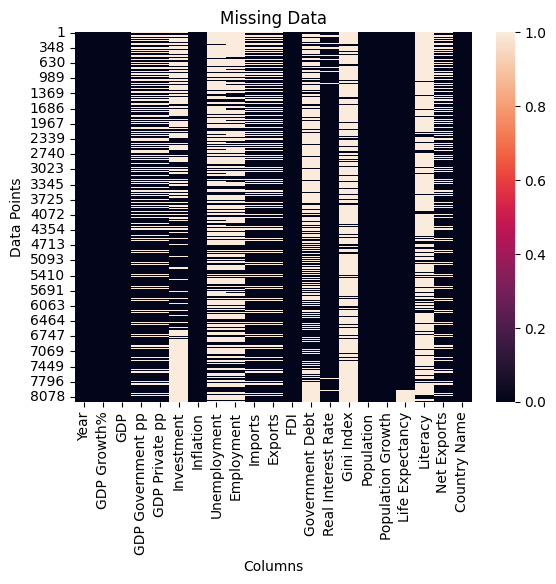

In [31]:
#Creating a heat map to visualize the missing data
sns.heatmap(SADC_Countries.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

In [32]:
# Interpolate missing values and null values
SADC_Countries = SADC_Countries.interpolate(method='linear')

In [33]:
# Checking if the interpolation managed to clear out the missing or null values
SADC_Countries.isnull().sum()

Year                   0
GDP Growth%            0
GDP                    0
GDP Government pp      1
GDP Private pp         1
Investment             1
Inflation              0
Unemployment          11
Employment            23
Imports                1
Exports                1
FDI                    0
Government Debt        0
Real Interest Rate     0
Gini Index            11
Population             0
Population Growth      0
Life Expectancy        0
Literacy              45
Net Exports            1
Country Name           0
dtype: int64

In [34]:
# Imputing missing values with mean
SADC_Countries = SADC_Countries.fillna(SADC_Countries.mean())

<ipython-input-34-ea596c9b2892>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  SADC_Countries = SADC_Countries.fillna(SADC_Countries.mean())


In [35]:
#  Checking if imputing managed to clear out the missing or null values
SADC_Countries.isnull().sum()

Year                  0
GDP Growth%           0
GDP                   0
GDP Government pp     0
GDP Private pp        0
Investment            0
Inflation             0
Unemployment          0
Employment            0
Imports               0
Exports               0
FDI                   0
Government Debt       0
Real Interest Rate    0
Gini Index            0
Population            0
Population Growth     0
Life Expectancy       0
Literacy              0
Net Exports           0
Country Name          0
dtype: int64

In [36]:
#Create a heatmap of the correlation matrix of the SADC Countries  DataFrame
def build_pearson_correlation_matrix_of_dataframe(size_x,size_y,dataframe,correlation_target,correlation_positve_criteria,correlation_negative_criteria):

    # Using Pearson Correlation

    plt.figure(figsize=(size_x,size_y))
    cor = dataframe.drop(['Year'],axis=1).corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

    # Correlation with output variable

    target = abs(cor[correlation_target])

    #Selecting and printing highly correlated features

    positiverelevant_features = target[target>correlation_positve_criteria]
    negativerelevant_featuress = target[target<correlation_negative_criteria]
    print(positiverelevant_features)
    print(negativerelevant_featuress)

<ipython-input-36-fa8f909ce99e>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dataframe.drop(['Year'],axis=1).corr()


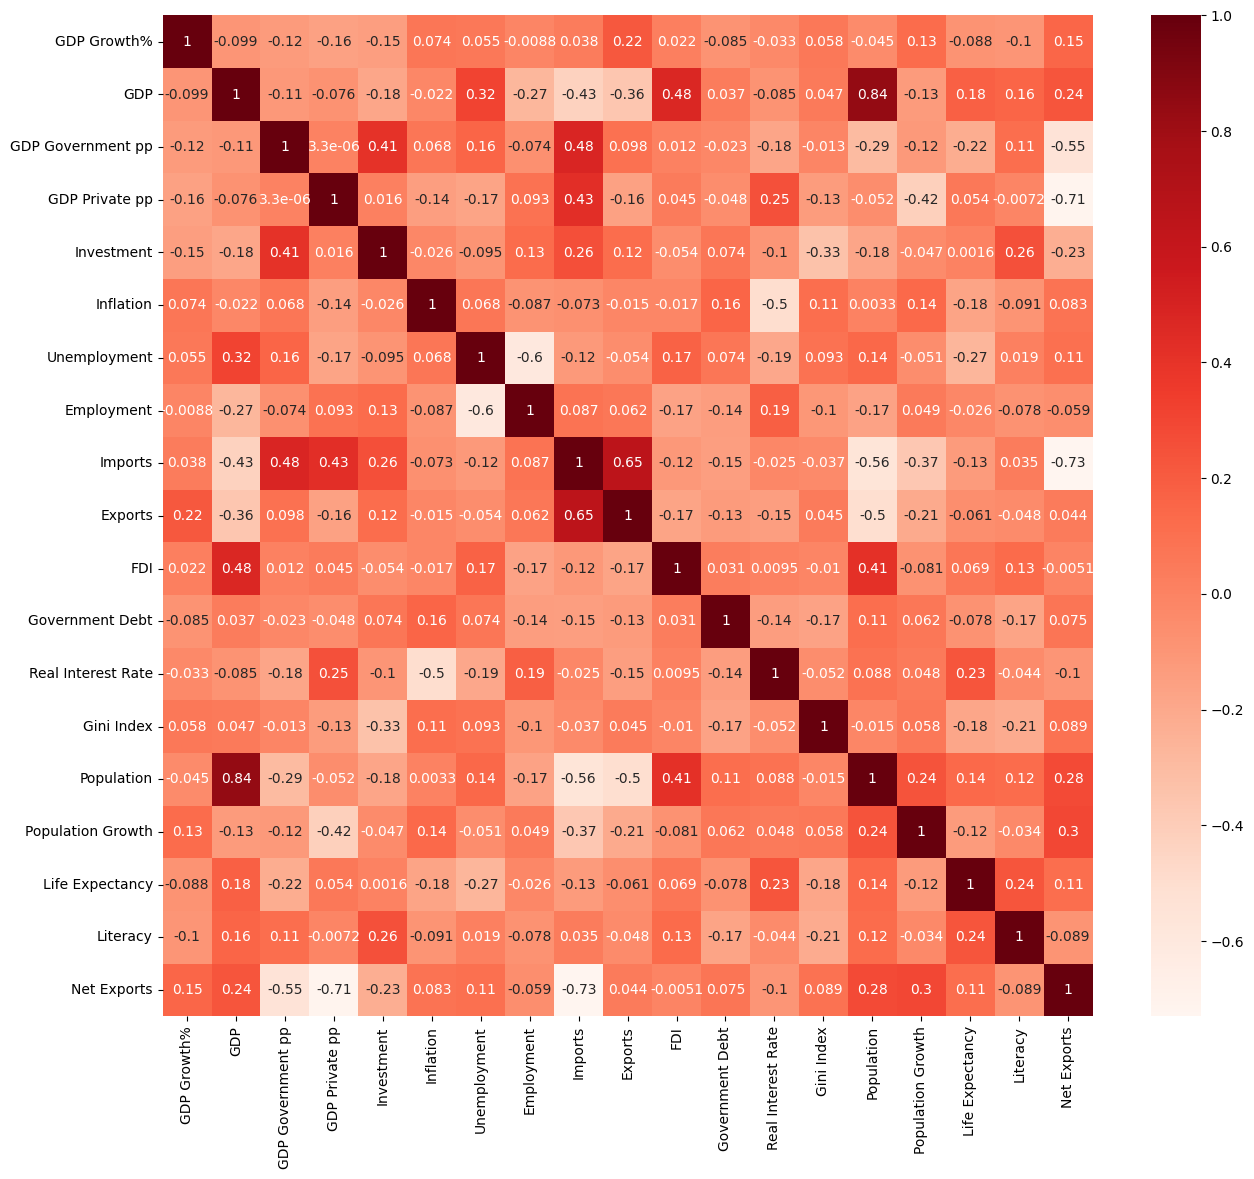

GDP           1.000000
Population    0.842485
Name: GDP, dtype: float64
Series([], Name: GDP, dtype: float64)


In [37]:
# Build a Pearson correlation matrix of the specified dataframe columns
build_pearson_correlation_matrix_of_dataframe(15, 13, SADC_Countries,'GDP', 0.7,-0.7)

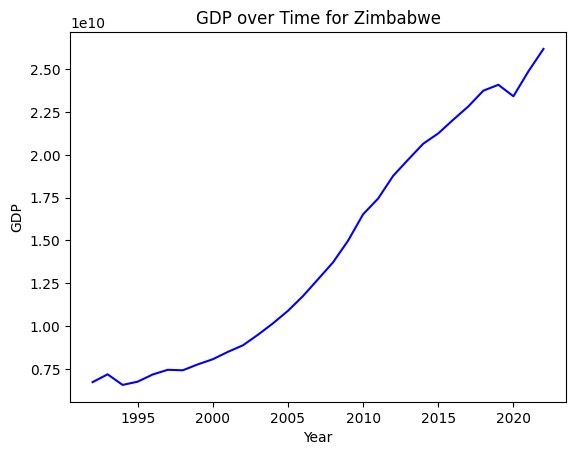

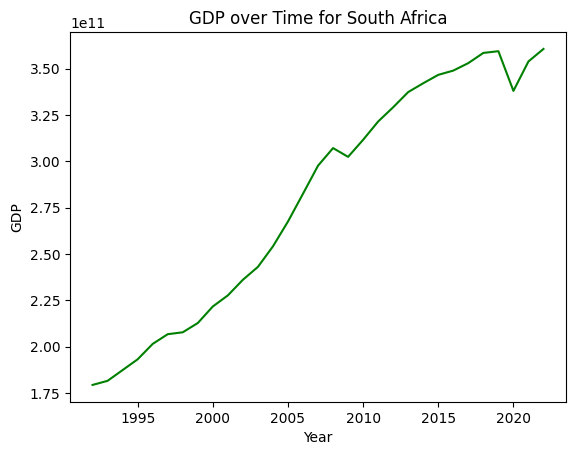

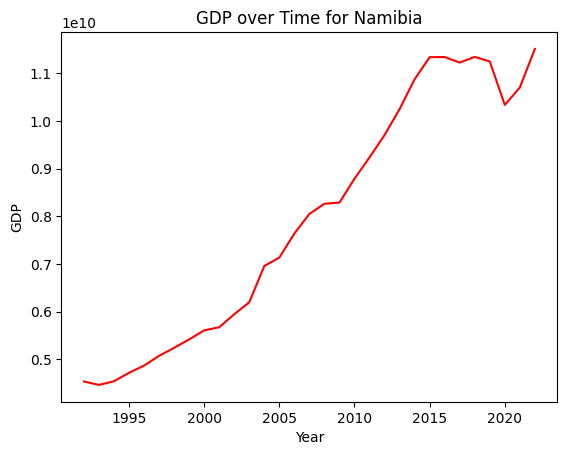

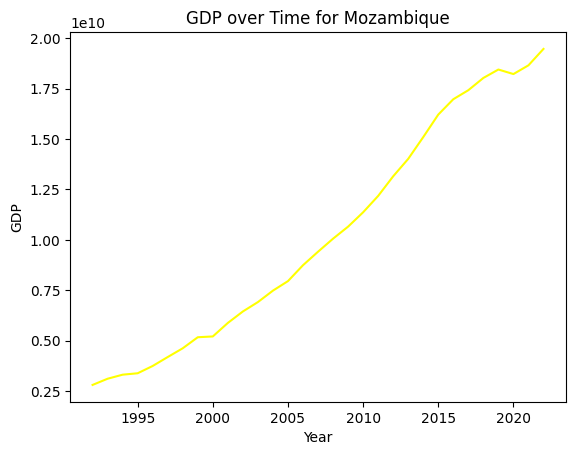

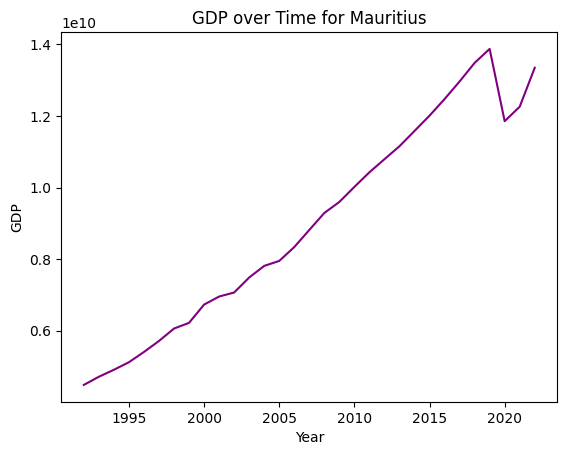

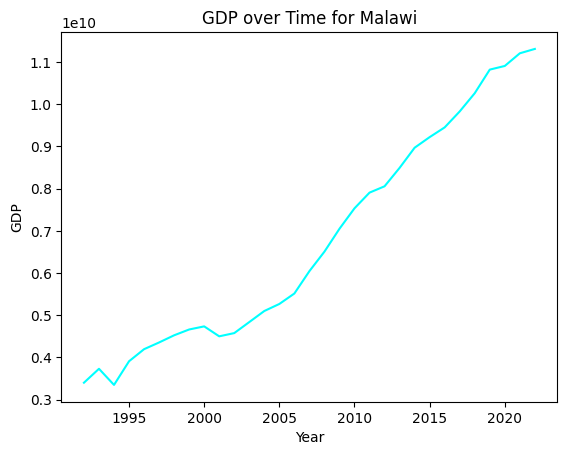

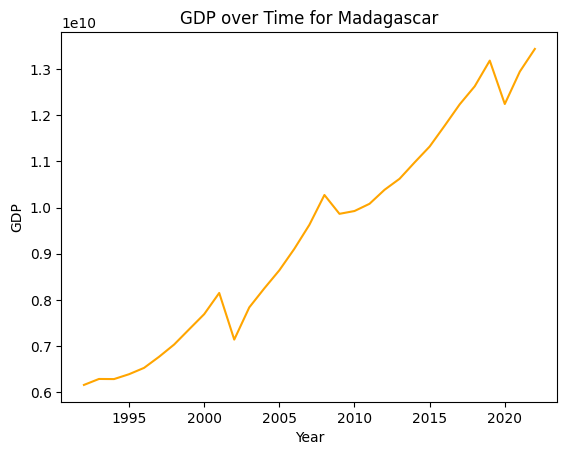

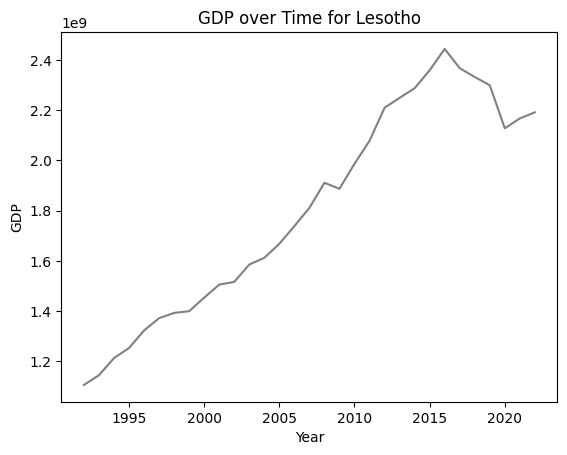

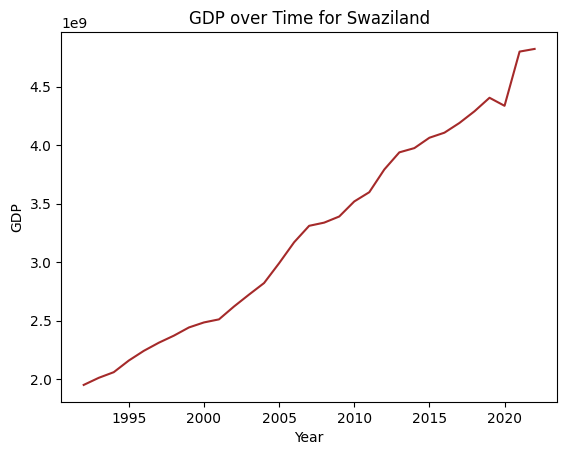

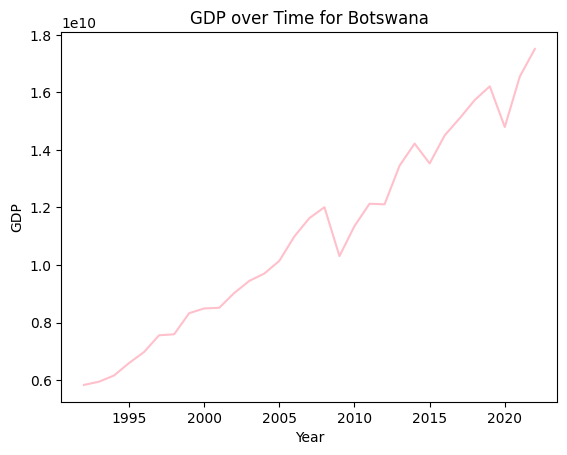

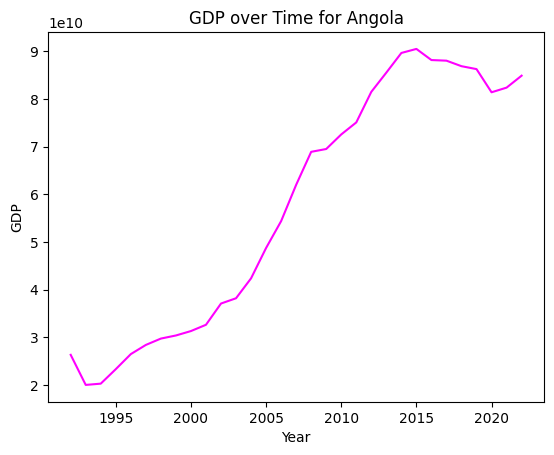

In [38]:
# Plot GDP for each country over the years separate diagram for each country use different colour for each country

# Extract unique country codes
country_codes = SADC_Countries['Country Name'].unique()

# Define colors for each country
colors = ['blue', 'green', 'red', 'yellow', 'purple', 'cyan', 'orange', 'grey', 'brown', 'pink', 'magenta']

# Loop through each country code and plot GDP over time
for i, country_code in enumerate(country_codes):
    # Create a new figure
    plt.figure()

    # Subset data for the current country
    country_data = SADC_Countries[SADC_Countries['Country Name'] == country_code]

    # Plot GDP over time
    plt.plot(country_data['Year'], country_data['GDP'], color=colors[i], label=country_code)

    # Set title and axis labels
    plt.title('GDP over Time for {}'.format(country_code))
    plt.xlabel('Year')
    plt.ylabel('GDP')

    # Show the plot
    plt.show()


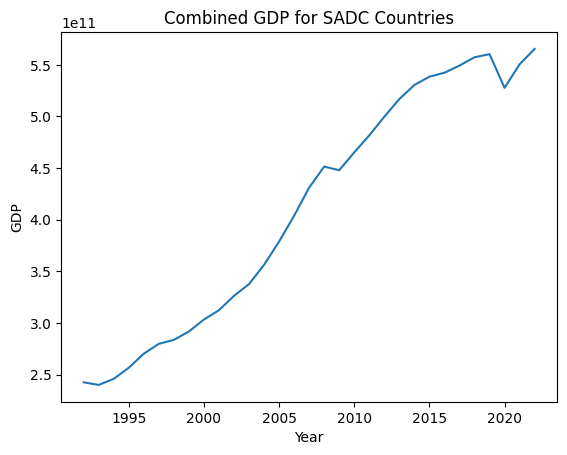

In [39]:
# Plot combined gdp for SADC_Countries

# Calculate the total GDP for each year
combined_gdp = SADC_Countries.groupby('Year')['GDP'].sum()

# Create a line chart of the combined GDP
plt.figure()
plt.plot(combined_gdp.index, combined_gdp.values)

# Set title and axis labels
plt.title('Combined GDP for SADC Countries')
plt.xlabel('Year')
plt.ylabel('GDP')

# Show the plot
plt.show()


In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

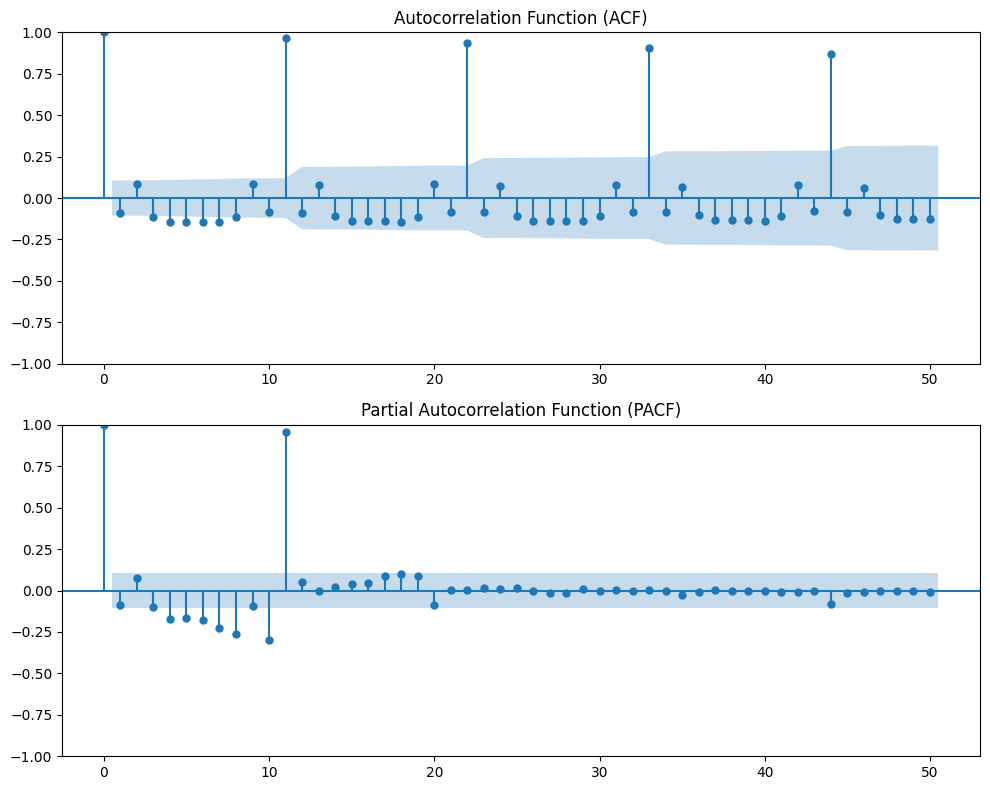

In [41]:
# Plot ACF and PACF for GDP to check for seasonality and trends
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(SADC_Countries['GDP'], ax=ax[0], lags=50)
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(SADC_Countries['GDP'], ax=ax[1], lags=50)
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# Model Development

# Random Forest Model Training

In [42]:

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the 'Country Name' column
SADC_Countries['Country Name'] = le.fit_transform(SADC_Countries['Country Name'])


In [ ]:
#Encoding legend for Country name

country_name_mapping = {
    0: 'Angola',
    1: 'Botswana',
    2: 'Democratic Republic of the Congo',
    3: 'Eswatini',
    4: 'Lesotho',
    5: 'Madagascar',
    6: 'Malawi',
    7: 'Mauritius',
    8: 'Mozambique',
    9: 'Namibia',
    10: 'Seychelles',
    11: 'South Africa',
    12: 'Tanzania',
    13: 'Zambia',
    14: 'Zimbabwe'
}

In [43]:
# Extracting the target variable 'GDP' and creating the feature matrix X

y = SADC_Countries['GDP']
X = SADC_Countries.drop(['GDP'], axis=1)

# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [44]:
# Creating a StandardScaler instance
sc_X = StandardScaler()

# Standardizing the feature matrices for training and testing sets
X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)

# Keeping the target variables unchanged
y2_train = y_train
y2_test = y_test

In [45]:
y2_train

7753    3.539448e+11
5152    1.008187e+10
4467    6.890685e+10
3991    1.272951e+10
2233    1.453365e+09
            ...     
2073    3.037660e+10
1483    2.311806e+09
7819    2.167860e+09
8085    2.192030e+09
267     7.176782e+09
Name: GDP, Length: 272, dtype: float64

In [46]:
# Creating a new target variable 'y3'
y3 = y

# Creating a new feature matrix 'X3' by excluding specified columns
X3 = SADC_Countries.get(["GDP",'Population'])

# Splitting the new data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

In [47]:
#Creating a new instance of StandardScaler
sc_X4 = StandardScaler()

# Standardizing the new feature matrices for training and testing sets
X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)

# Keeping the target variables unchanged
y4_train = y3_train
y4_test = y3_test

In [48]:
# Creating two RandomForestRegressor models with different feature sets

# RandomForestRegressor model with all original features
rf1 = RandomForestRegressor(random_state=101, n_estimators=100)
rf1.fit(X_train, y_train)

# RandomForestRegressor model with a subset of features
rf3 = RandomForestRegressor(random_state=101, n_estimators=100)
rf3.fit(X3_train, y3_train)

RandomForestRegressor(random_state=101)

# Prediction - Random Forest Model

In [49]:
# Making predictions using RandomForestRegressor models for different feature sets

# Predictions using RandomForestRegressor model with all original features
rf1_pred = rf1.predict(X_test)

# Predictions using RandomForestRegressor model with a subset of features
rf3_pred = rf3.predict(X3_test)

# Evaluation - Random Forest Model

Random Forest Performance:

all features, No scaling:
MAE: 2087445528.7286522
RMSE: 3894602944.3125825
R2_Score:  0.9975693115963357

selected features, No scaling:
MAE: 475898828.2760085
RMSE: 1214857158.7719202
R2_Score:  0.999763487908966


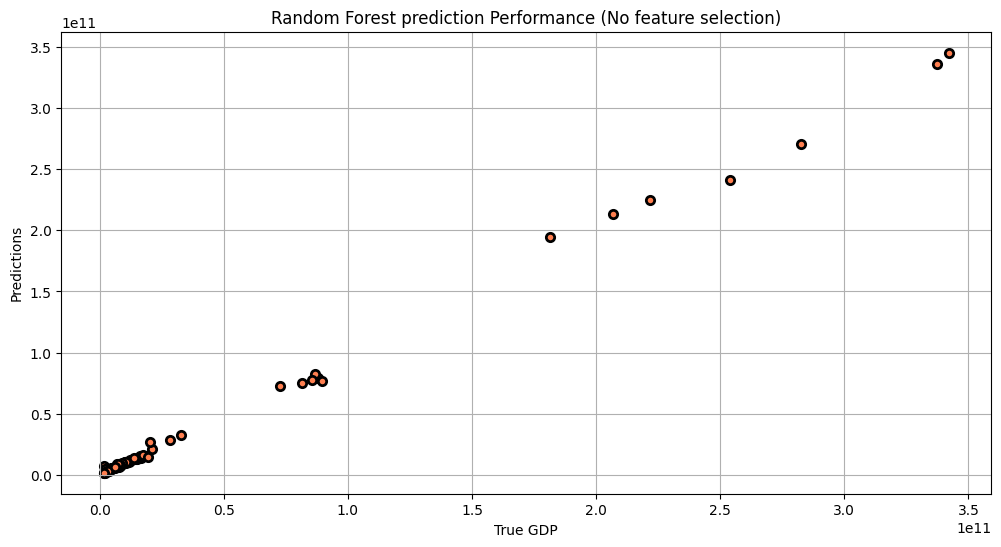

In [50]:
# Evaluating and visualizing the performance of RandomForestRegressor models on the test set
print('Random Forest Performance:')

# Performance metrics for RandomForestRegressor model with all original features
print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, rf1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, rf1_pred))

# Performance metrics for RandomForestRegressor model with a subset of features
print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, rf3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, rf3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, rf3_pred))

# Scatter plot to visualize RandomForestRegressor predictions against actual values
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP')
plt.ylabel('Predictions')
plt.title('Random Forest prediction Performance (No feature selection)')
plt.grid()
plt.show()

# Model Optimization - Random Forest Regressor

In [51]:
# Defining the hyperparameter grid for RandomForestRegressor
rf_param_grid = {
    'n_estimators': [50, 75, 125],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # specifying possible values for max_features
}

In [52]:
# Creating a GridSearchCV object for RandomForestRegressor with the specified parameter gridr
rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)

In [53]:
# Fitting the RandomForestRegressor model using the training data (X_train and y_train) and searching over the specified hyperparameter grid
rf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 75, 125]})

In [54]:
# Retrieving the best hyperparameters found during the grid search for the RandomForestRegressor
rf_grid.best_params_

{'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [55]:
# Retrieving the best estimator (model) found during the grid search for the RandomForestRegressor
rf_grid.best_estimator_

RandomForestRegressor(max_depth=10, max_features=None, n_estimators=75)

# Evaluation - Random Forest Regressor Model

Random Forest Performance:
MAE: 1982706674.6054478
RMSE: 3888485872.322902
R2_Score: 0.9975769411387444


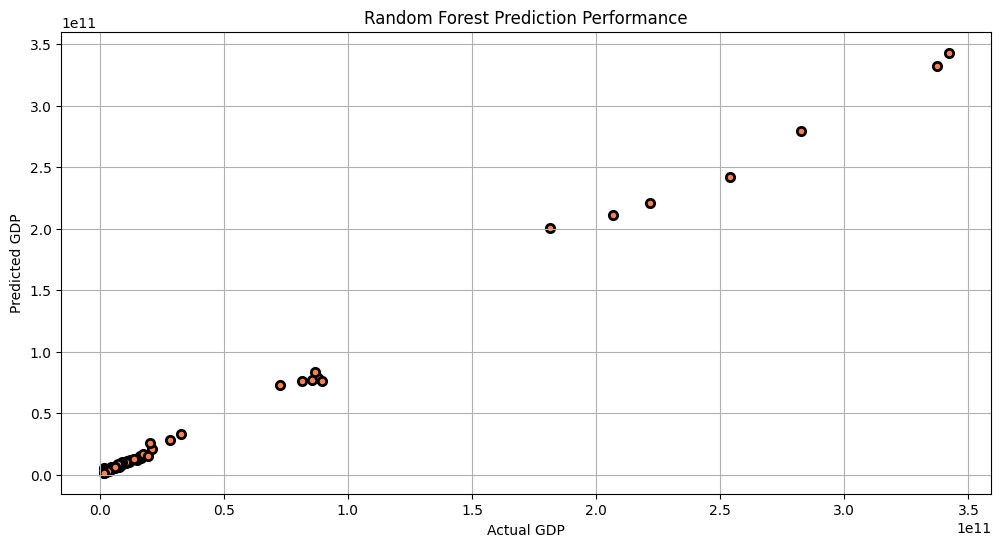

In [56]:
# Define and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Print performance metrics
print('Random Forest Performance:')
print('MAE:', metrics.mean_absolute_error(y_test, rf_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)))
print('R2_Score:', metrics.r2_score(y_test, rf_predictions))

# Scatter plot to visualize predictions against actual values
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_predictions, color='coral', linewidths=2, edgecolors='k')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Random Forest Prediction Performance')
plt.grid()
plt.show()

In [57]:
# Making predictions on the test set using the best-performing RandomForestRegressor model obtained from the grid search
# Predictions using the RandomForestRegressor model with the best hyperparameters
rf_grid_predictions = rf_grid.predict(X_test)

In [59]:
# Specifying the model name
model_name3 = rf_grid_predictions

# Saving the model with the model name in the file path
rf_Model_path = "/content/RF_sklearn.pkl"
joblib.dump(model_name3, rf_Model_path)

['/content/RF_sklearn.pkl']

### GRADIENT BOOSTER

In [60]:
# Gradient Boosting Regressor model with specified hyperparameters for the original features
gbm1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)

# Gradient Boosting Regressor model with specified hyperparameters for the selected features
gbm3 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)

# Fitting the Gradient Boosting Regressor models to the training data
gbm1.fit(X_train, y_train)
gbm3.fit(X3_train, y3_train)

GradientBoostingRegressor(random_state=101)

# Predictions - Gradient Boosting Regressor Models

In [61]:
# Generating predictions using the trained Gradient Boosting Regressor models

# Predictions for the model with original features
gbm1_pred = gbm1.predict(X_test)

# Predictions for the model with selected features
gbm3_pred = gbm3.predict(X3_test)

# Evaluation - Gradient Boosting Regressor Models

Gradiant Boosting Performance:

all features, No scaling:
MAE: 2235328871.904239
RMSE: 4053337459.6193156
R2_Score:  0.9973671359288685

selected features, No scaling:
MAE: 1010480432.0410824
RMSE: 2666806724.818238
R2_Score:  0.9988603119447308


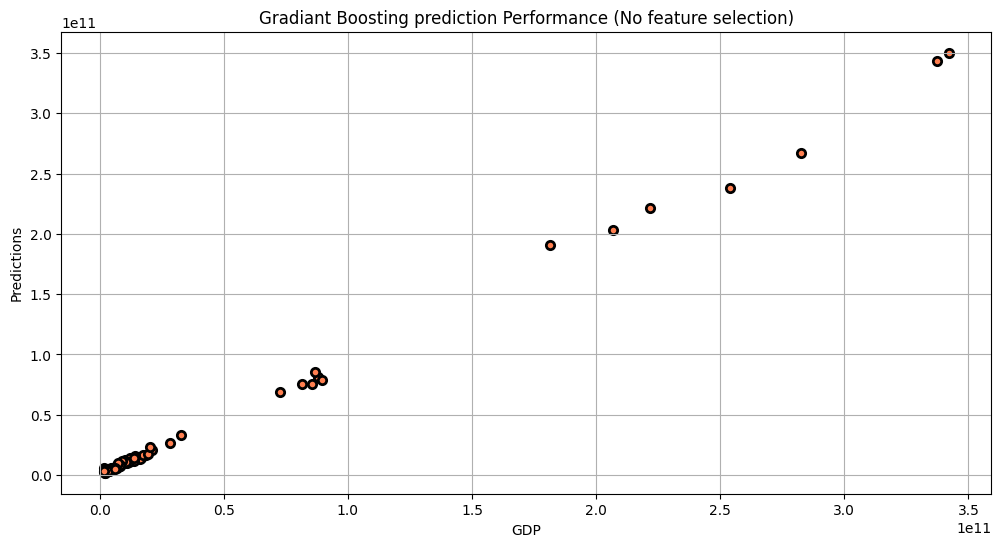

In [62]:
# Evaluation and visualizing the performance of the Gradient Boosting Regressor models

# Printing performance metrics for the model with original features and no feature selection
print('Gradiant Boosting Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, gbm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, gbm1_pred))

# Performance metrics for the model with selected features and no feature selection
print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, gbm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, gbm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, gbm3_pred))

# Scatter plot to visualize predictions against actual values for the model with original features
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('GDP')
plt.ylabel('Predictions')
plt.title('Gradiant Boosting prediction Performance (No feature selection)')
plt.grid()
plt.show()

# GBM Regressor - Feature Importance and Visualization

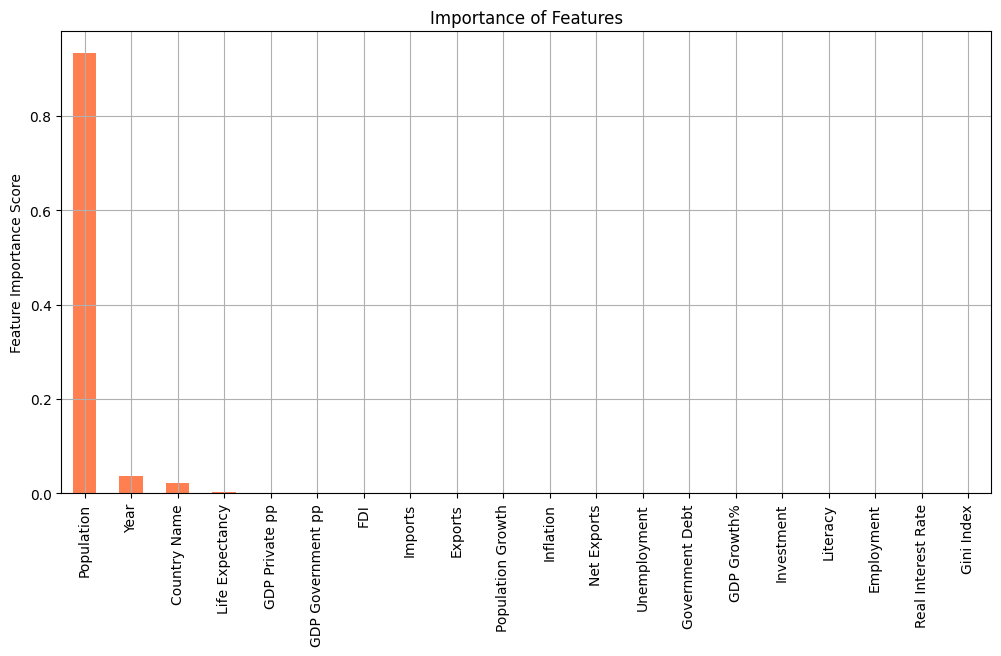

In [63]:
# Visualizing the feature importances of the Gradient Boosting Regressor model

# Calculating feature importances and sort them in descending order
feat_imp = pd.Series(gbm1.feature_importances_, list(X_train)).sort_values(ascending=False)

# Create a bar plot to display the importance of each feature
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Importance of Features', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

# Model Optimization - Gradient Boosting Regressor

In [64]:
# Grid search for hyperparameter tuning of Gradient Boosting Regressor

# Define a parameter grid with various hyperparameter values
gbm_param_grid = {'learning_rate':[1,0.1, 0.01, 0.001],
           'n_estimators':[50, 75, 125],
          'max_depth':[3, 5, 8],
          'subsample':[0.7, 1],
          'min_samples_leaf':[1, 20],
          'min_samples_split':[10, 20],
          'max_features':[4, 7]}

# Create a GridSearchCV object for Gradient Boosting Regressor
gbm_tuning = GridSearchCV(estimator =GradientBoostingRegressor(random_state=101),
                          param_grid = gbm_param_grid,
                          n_jobs=-1,  # Use all available CPU cores for parallel processing
                          cv=5)   # 5-fold cross-validation

# Perform grid search to find the best hyperparameters
gbm_tuning.fit(X_train,y_train)

# Print the best hyperparameters found during the grid search
print(gbm_tuning.best_params_)

{'learning_rate': 1, 'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 75, 'subsample': 1}


# Predictions - Best-Performing Gradient Boosting Regressor Model

In [65]:
# Making predictions on the test set using the best-performing Gradient Boosting Regressor model obtained from the grid search
gbm_grid_predictions = gbm_tuning.predict(X_test)

# Evaluation - Optimized Gradient Boosting Regressor Model

MAE: 4256962748.1434793
RMSE: 7700981760.486356
R2_Score:  0.99049624782382


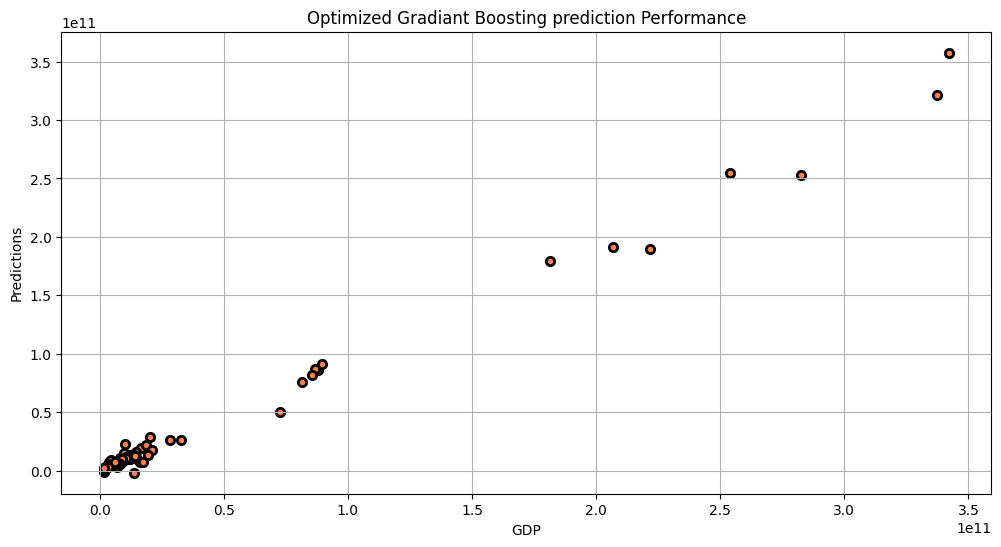

In [66]:
# Printing performance metrics for the optimized Gradient Boosting Regressor model
print('MAE:', metrics.mean_absolute_error(y_test, gbm_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, gbm_grid_predictions))

# Creating a scatter plot to visualize optimized Gradient Boosting predictions against actual values
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('GDP')
plt.ylabel('Predictions')
plt.title('Optimized Gradiant Boosting prediction Performance')
plt.grid()
plt.show()

# Model Optimization - Gradient Boosting Regressor model with specified hyperparameters

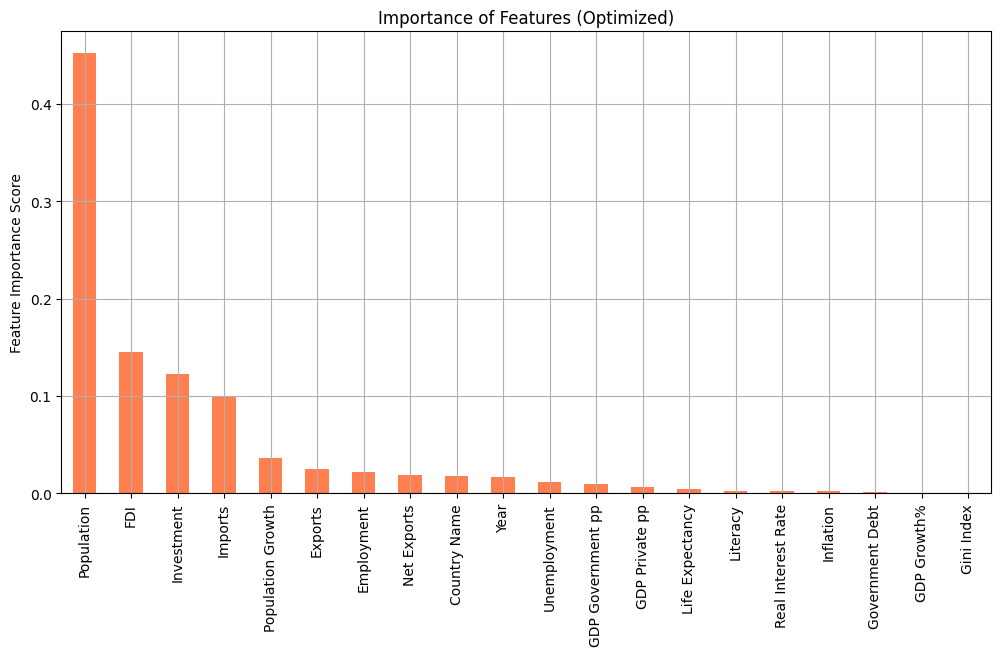

In [67]:
# Creating an optimized Gradient Boosting Regressor model with specified hyperparameters
gbm_opt = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500,max_depth=5, min_samples_split=10, min_samples_leaf=1,
                                    subsample=0.7,max_features=7, random_state=101)

# Fitting the optimized model to the training data
gbm_opt.fit(X_train,y_train)

# Calculating and visualizing the feature importances of the optimized Gradient Boosting Regressor model
feat_imp2 = pd.Series(gbm_opt.feature_importances_, list(X_train)).sort_values(ascending=False)

# Creating a bar plot to display the importance of each feature (Optimized model)
fig = plt.figure(figsize=(12, 6))
feat_imp2.plot(kind='bar', title='Importance of Features (Optimized)', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

In [68]:
# Specify the model name
model_name4 = gbm_grid_predictions

# Save the model with the model name in the file path
gbm_Model = "/content/gbm_sklearn.pkl"
joblib.dump(model_name4, gbm_Model)


['/content/gbm_sklearn.pkl']

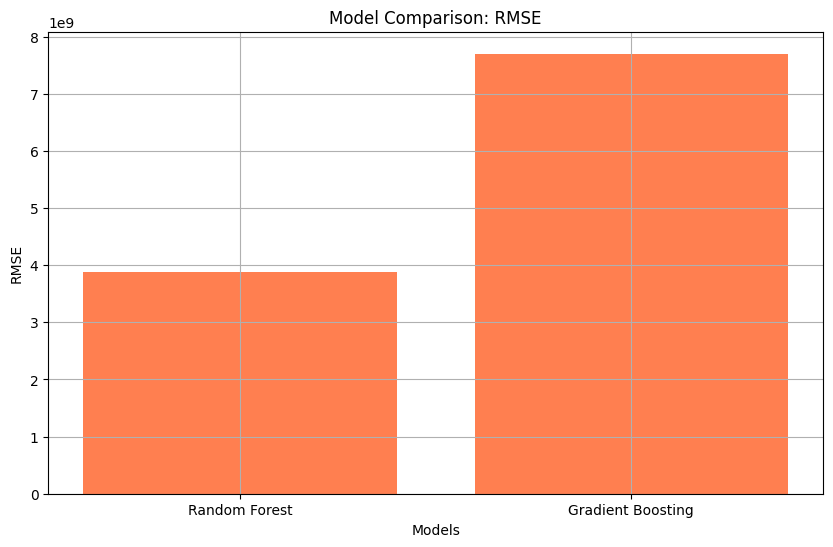

In [70]:
#Plot RSME for each model

# Calculate RMSE for each model
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
gbm_rmse = np.sqrt(metrics.mean_squared_error(y_test, gbm_grid_predictions))

# Create a bar chart to display RMSE for each model
models = ['Random Forest', 'Gradient Boosting']
rmse_values = [rf_rmse, gbm_rmse]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='coral')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE')
plt.grid()
plt.show()


In [109]:
# Save the best model
best_model = rf_grid.best_estimator_
joblib.dump(best_model, "best_model.pkl")

# Make Predictions using the saved model
loaded_model = joblib.load("best_model.pkl")
new_data = pd.DataFrame({
    'Year': [int(input('Enter Year: '))],
    'GDP Growth%': [float(input('Enter GDP Growth Rate: '))],
    'GDP Government pp': [float(input('Enter : GDP Government pp: '))],
    'GDP Private pp': [float(input('Enter GDP Private pp: '))],
    'Investment': [float(input('Enter Investment: '))],
    'Inflation': [float(input('Enter Inflation: '))],
    'Unemployment': [float(input('Enter Unemployemnt: '))],
    'Employment': [float(input('Enter Employemnt: '))],
    'Imports':[float(input('Enter Import: '))],
   'Exports': [float(input('Enter Export: '))],
    'FDI': [float(input('Enter FDI: '))],
    'Government Debt': [float(input('Enter Government Debt: '))],

    'Real Interest Rate': [float(input('Enter Interest Rate: '))],
     'Gini Index': [float(input('Enter GINI Index: '))],
    'Population': [float(input('Enter Population: '))],
    'Population Growth': [float(input('Enter Population Growth: '))],
    'Life Expectancy': [float(input('Enter Life Expectancy: '))],
    'Literacy': [float(input('Enter Literacy: '))],
    'Net Exports': [float(input('Enter Net Exports: '))],
    'Country Name': [int(input("Enter Country:  0: Angola, 1: Botswana, 2: Democratic Republic of the Congo, 3: Eswatini,4: Lesotho, 5: Madagascar, 6: Malawi, 7: Mauritius,8: Mozambique,9: Namibia, 10: Seychelles, 11: South Africa,12: Tanzania, 13: Zambia, 14: Zimbabwe"))]})


prediction = loaded_model.predict(new_data)[0]
print(f'Predicted GDP for {country_name_mapping[int(new_data["Country Name"])]} in {new_data["Year"]}: {prediction}')

KeyboardInterrupt: Interrupted by user